## 1. Introduction

### 1.1 Problem Statement
<br>
<div style="text-align: justify">
Given the highly competitive airline industry, airline companies are required to consistently provide top-notch services. It is through customer insights where airline companies can have a better understanding of passengers' satisfaction level towards the facilities and services offered at the airlines. Therefore, building classification models will help to predict and analyze the satisfaction level of passengers and at the same time provide insights for airlines companies to understand the factors affecting the ratings of customer satisfaction.
</div>

### 1.2 Goals of Project
1. Learn how to explore data (EDA), pre-process data as well as leverage on machine learning classification algorithms to predict customer satisfaction as accurately as possible - either satisfied or neutral/dissatisfied
2. Explore various machine learning algorithms, ensemble methods and to identify which one is most suited
3. Learn how to improve the performance of models by fine-tuning the hyperparameters
4. Provide key takeaways for each stages of data mining based on the presented facts and observations gathered

### 1.3 Background of Dataset
<br>
<div style="text-align: justify">
This dataset contains an airline passenger satisfaction survey and is retrieved from Kaggle. It consists of two csv files - train.csv to train and build the model with as well as test.csv to see how well our models can predict the future unseen data.

For both of the training and testing dataset, we have 24 columns each - ID, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight Wifi Service, Departure/Arrival Time Convenient, Ease of Online Booking, Gate Location, Food and Drink, Online Boarding, Seat Comfort, Inflight Entertainment, On-board Service, Leg Room Service, Baggage Handling, Checkin Service, Inflight Service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes as well as Satisfaction.

<b> Data Source: </b> https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction
</div>

## 2. Getting Started

### 2.1 Import required libraries

In [1]:
# import packages 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Read the file

In [2]:
# read data
df = pd.read_csv('train.csv', index_col=0)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## 3. Exploratory Data Analysis - EDA
<br>
<div style="text-align: justify">
Before we train our model, it is important to explore and understand the underlying structure of our data such as features/variables, the relationships between variables and other more insights. This would help us in the subsequent model selection and training.
</div>

### 3.1 Variables Type and Missing Values

In [3]:
df.info()

# 310 values missing under Arrival Delay in Minutes 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [4]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

### 3.2 Summary Statistics 

In [5]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Key Takeaways
1. A total of 103904 rows and 24 columns
2. "Arrival Delay in Minutes" column has 310 missing values, hence imputation by attribute mean is required
3. Mixed of categorical and numerical data, thus label encoding is needed to handle categorical values subsequently


### 3.3 Overall Satisfaction Count

C:\Users\Ong Yan Ning\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

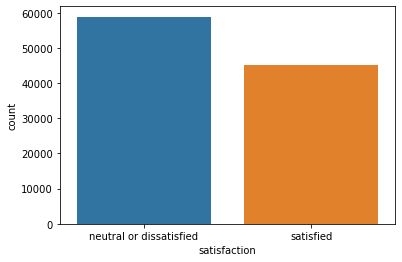

In [6]:
sns.countplot(df['satisfaction'])

In [7]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

### 3.4 Overall Type of Travel and Class

C:\Users\Ong Yan Ning\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

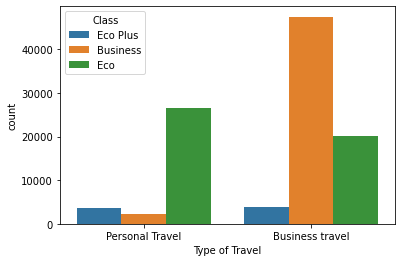

In [8]:
sns.countplot(df['Type of Travel'], hue=df['Class'])

### 3.5 Distribution of Age  

(array([1894., 1996., 1340., 2701., 1882., 5378., 7422., 4475., 5669.,
        3177., 5527., 6956., 5543., 7228., 4821., 6847., 6411., 3963.,
        5586., 3625., 4393., 2322., 1421., 1954.,  711.,  299.,  193.,
          75.,   78.,   17.]),
 array([ 7. ,  9.6, 12.2, 14.8, 17.4, 20. , 22.6, 25.2, 27.8, 30.4, 33. ,
        35.6, 38.2, 40.8, 43.4, 46. , 48.6, 51.2, 53.8, 56.4, 59. , 61.6,
        64.2, 66.8, 69.4, 72. , 74.6, 77.2, 79.8, 82.4, 85. ]),
 <BarContainer object of 30 artists>)

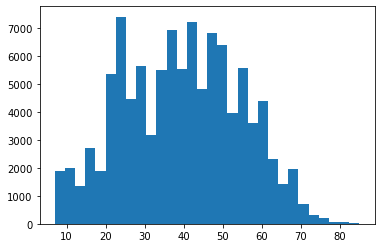

In [9]:
plt.hist(df['Age'],bins=30)

### 3.6 Overall Count of Customer Type 

C:\Users\Ong Yan Ning\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Type', ylabel='count'>

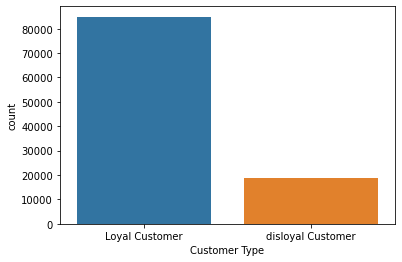

In [10]:
sns.countplot(df['Customer Type'])

In [11]:
df['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

### 3.7 Overall Count of Gender 

C:\Users\Ong Yan Ning\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

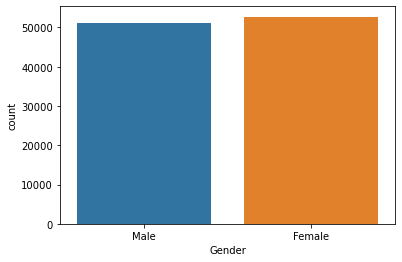

In [12]:
sns.countplot(df['Gender'])

### 3.8 Overall Count of Class Type 

C:\Users\Ong Yan Ning\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

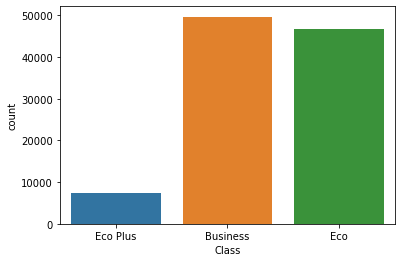

In [13]:
sns.countplot(df['Class'])

### 3.9 Distribution of Departure Delay in Minutes 

C:\Users\Ong Yan Ning\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Departure Delay in Minutes'>

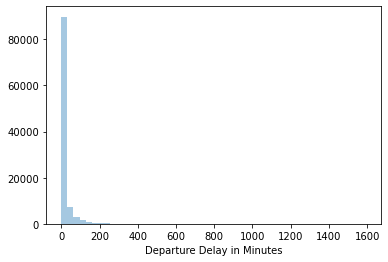

In [14]:
sns.distplot(df['Departure Delay in Minutes'], kde=False)

### 3.10 Distribution of Arrival Delay in Minutes

#### Impute missing values with mean

In [15]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), axis=0, inplace=True)

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

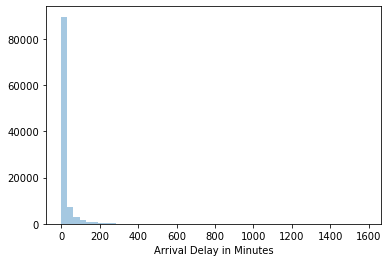

In [16]:
sns.distplot(df['Arrival Delay in Minutes'], kde=False)

### 3.11 Distribution of total score across 14 variables with score ranging from 0-5 (0: Not Applicable)

In [17]:
df['total_score'] = df['Inflight wifi service'] + df['Departure/Arrival time convenient'] + df['Ease of Online booking'] + df['Gate location'] + df['Food and drink'] + df['Online boarding'] + df['Seat comfort'] + df['Inflight entertainment'] + df['On-board service'] + df['Leg room service'] + df['Baggage handling'] + df['Checkin service']+ df['Inflight service'] + df['Cleanliness']

Text(0, 0.5, 'Total Score')

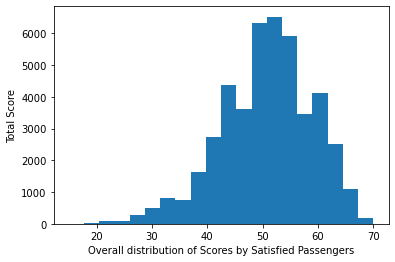

In [18]:
satisfied = df[df['satisfaction']=='satisfied']
plt.hist(satisfied['total_score'],bins=20)
plt.xlabel("Overall distribution of Scores by Satisfied Passengers")
plt.ylabel("Total Score")

`passengers who gave low total score of less than 40 are also satisfied`

Text(0, 0.5, 'Total Score')

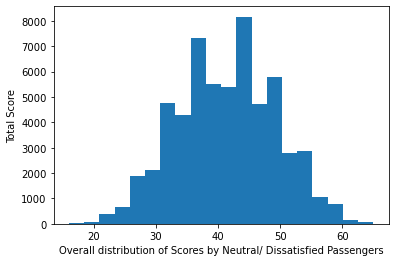

In [19]:
satisfied = df[df['satisfaction']=='neutral or dissatisfied']
plt.hist(satisfied['total_score'],bins=20)
plt.xlabel("Overall distribution of Scores by Neutral/ Dissatisfied Passengers")
plt.ylabel("Total Score")

`passengers who gave high total score of more than 50 are also neutral/ dissatisfied`

In [20]:
df.drop(columns=['total_score'],axis=1,inplace=True)

In [21]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### 3.12 Correlation  

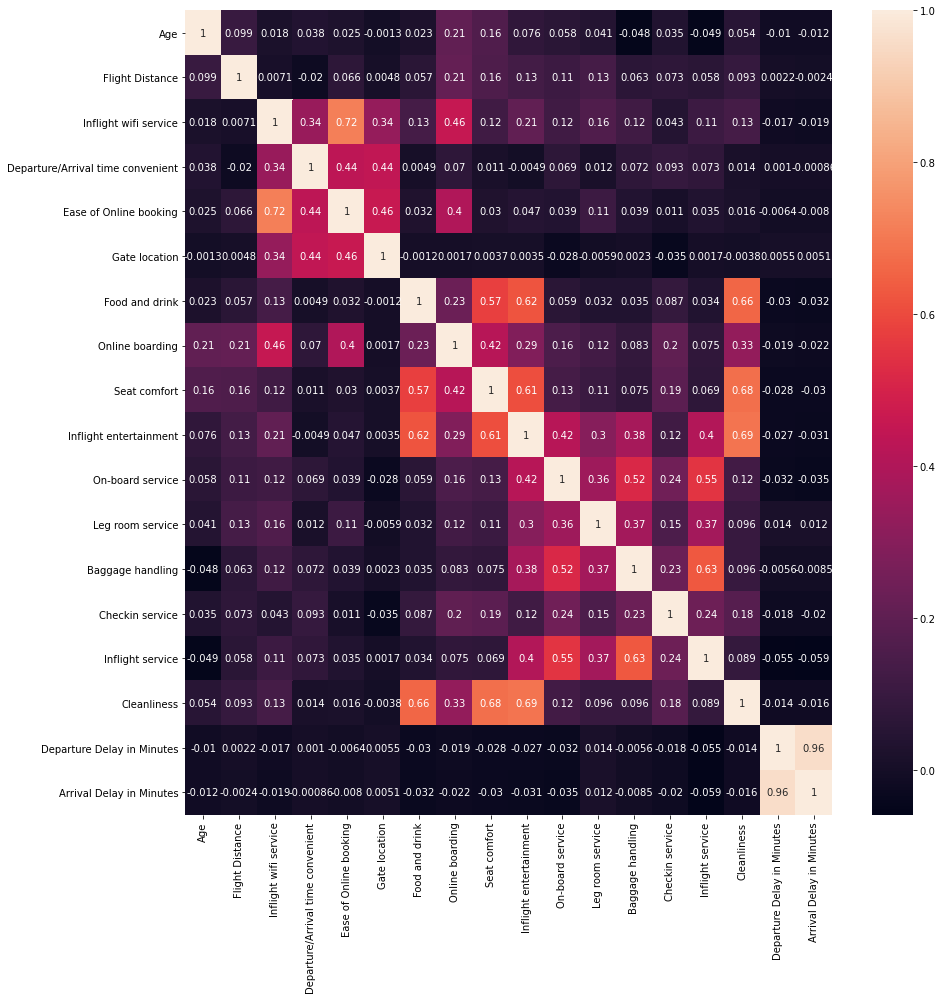

In [22]:
plt.figure(figsize=(14,14))
sns.heatmap(df.drop(['id'],axis=1).corr(), annot=True)
plt.tight_layout()

# Ease of Online Booking , Inflight wifi service 0.72
# Cleanliness , Inflight entertainment 0.69
# Seat comfort, Cleanliness 0.68

#### Key Takeaways
1. Data is relatively balanced with 45025 records (approximate 45%) satisfied and 58879 records (approximate 55%) neutral or dissatisfied 
2. There are no duplicates = observations are unique
3. Age distribution is normally distributed with the majority of the passengers under the age range of 20 to 60 years old
4. Higher number of customers who are loyal as compared to those who are disloyal
5. Number of passengers by gender are relatively the same
6. Only a few variables are highly correlated (above 0.65 in this case) --> Ease of Online Booking & Inflight Wifi Service (0.72), Cleanliness & Inflight Entertainment (0.69), Seat Comfort & Cleanliness (0.68) and Cleanliness & Food and Drink (0.66)
7. Little to no correlation between average ratings of all ratings variables and satisfaction as not all passengers who gave high overall rating scores are satisfied vice versa


## 4. Clustering

As part of EDA, clsutering is being done to segragate different groups of passengers with similar patterns.

### 4.1 Transformation

As some of the data are relatively skewed, with skewness less than -1 or greater than +1, transformation methods like square root is needed to reduce the skewness of variables.

In this case, variables like Flight Distance, Departure Delay in Minutes and Arrival Delay in Minutes will be transformed as shown in the following.

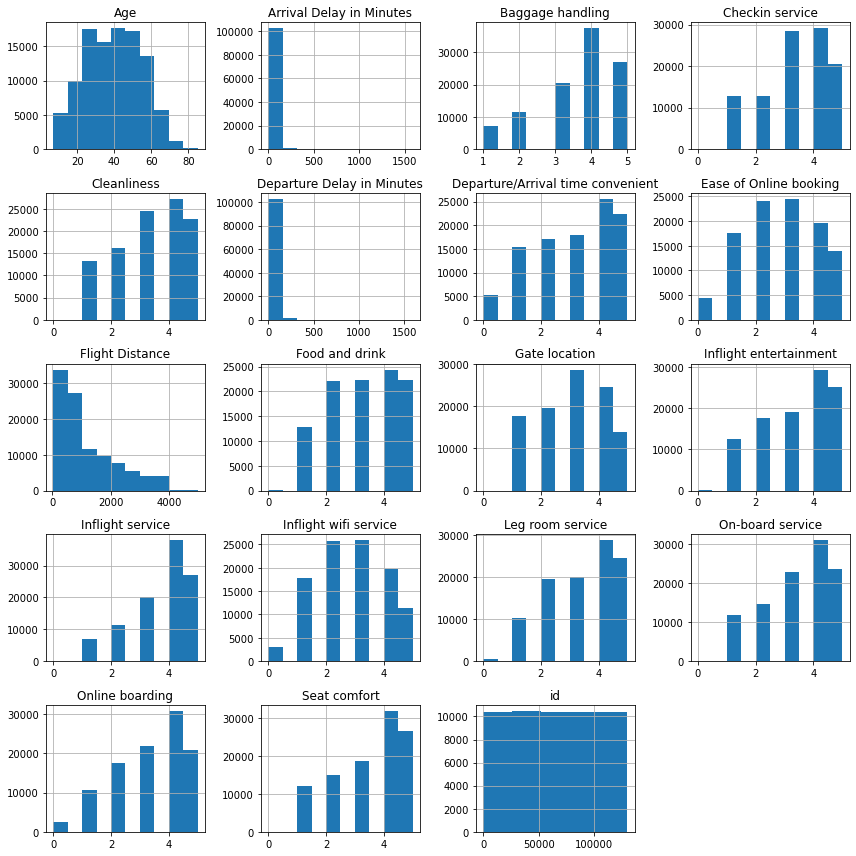

In [23]:
#Histogram
df.hist(figsize = (12, 12))
plt.tight_layout()

In [24]:
df.skew()

id                                   0.002864
Age                                 -0.004516
Flight Distance                      1.109466
Inflight wifi service                0.040408
Departure/Arrival time convenient   -0.334399
Ease of Online booking              -0.018294
Gate location                       -0.058889
Food and drink                      -0.151279
Online boarding                     -0.453852
Seat comfort                        -0.482775
Inflight entertainment              -0.365131
On-board service                    -0.420031
Leg room service                    -0.350231
Baggage handling                    -0.677040
Checkin service                     -0.364982
Inflight service                    -0.690314
Cleanliness                         -0.300074
Departure Delay in Minutes           6.733980
Arrival Delay in Minutes             6.606499
dtype: float64

In [25]:
df['Log_Flightdistance'] = np.sqrt(df['Flight Distance'])
df['Log_Departuredelay'] = np.sqrt(df['Departure Delay in Minutes'])
df['Log_Arrivaldelay'] = np.sqrt(df['Arrival Delay in Minutes'])

print(df.head())

#Let's check skew values with transformation
print("\nskewness after transformation:\n")
print(df.skew())

       id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Baggage handling  Checkin service  \
0                

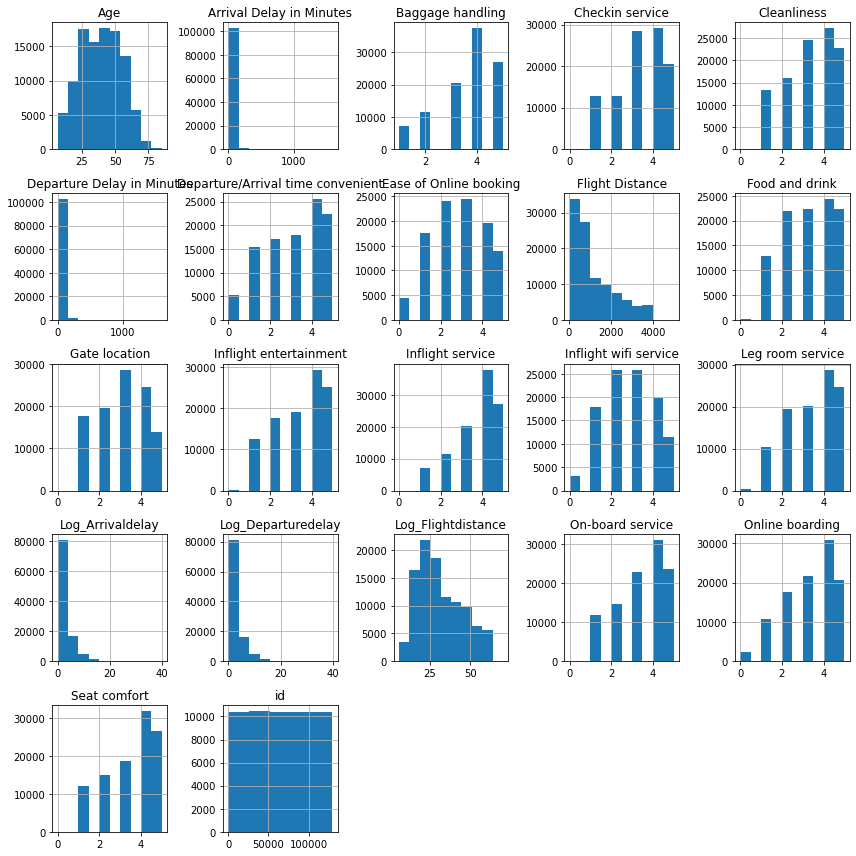

In [26]:
#Histogram
df.hist(figsize = (12, 12))
plt.tight_layout()

In [27]:
traindf1 = df.drop(["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"], axis=1)
traindf1.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Log_Flightdistance,Log_Departuredelay,Log_Arrivaldelay
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,3,4,3,1,...,4,3,4,4,5,5,neutral or dissatisfied,21.447611,5.000000,4.242641
1,5047,Male,disloyal Customer,25,Business travel,Business,3,2,3,3,...,1,5,3,1,4,1,neutral or dissatisfied,15.329710,1.000000,2.449490
2,110028,Female,Loyal Customer,26,Business travel,Business,2,2,2,2,...,4,3,4,4,4,5,satisfied,33.793490,0.000000,0.000000
3,24026,Female,Loyal Customer,25,Business travel,Business,2,5,5,5,...,2,5,3,1,4,2,neutral or dissatisfied,23.706539,3.316625,3.000000
4,119299,Male,Loyal Customer,61,Business travel,Business,3,3,3,3,...,3,4,4,3,3,3,satisfied,14.628739,0.000000,0.000000


### 4.2 Standardization

After transformation, all variables need to be standardized and adjusted to a common scale (0, 1) so to prevent any variables from dominating the clustering result.

In [28]:
#standardization
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

#fit the wines1 by calling the fit() function
print(scaler.fit(traindf1[['Age','Inflight wifi service', 
              'Departure/Arrival time convenient',
              'Ease of Online booking','Food and drink', 
              'Gate location', 'Online boarding','Seat comfort', 
              'Inflight entertainment', 
              'On-board service','Leg room service', 
              'Baggage handling', 'Checkin service',
              'Inflight service', 'Cleanliness', 'Log_Flightdistance', 'Log_Departuredelay', 'Log_Arrivaldelay']]))

StandardScaler()


In [30]:
#### Your code here ####
print(scaler.mean_)
print()

print(scaler.var_)
print()

[39.37970627  2.72968317  3.06029604  2.7569006   3.20212889  2.97688251
  3.25037535  3.43939598  3.35815753  3.38236257  3.35105482  3.63183323
  3.3042905   3.6404277   3.28635086 31.57978735  2.09946773  2.15213759]

[228.45992886   1.76311414   2.32583197   1.95698483   1.76764022
   1.63229974   1.82115689   1.73997514   1.77684714   1.65984098
   1.73079886   1.39451944   1.60121119   1.38217027   1.72204345
 192.16540648  10.40785352  10.54698209]



In [31]:
traindf_scaled_np = scaler.transform(traindf1[['Age','Inflight wifi service', 
              'Departure/Arrival time convenient',
              'Ease of Online booking','Food and drink', 
              'Gate location', 'Online boarding','Seat comfort', 
              'Inflight entertainment', 
              'On-board service','Leg room service', 
              'Baggage handling', 'Checkin service',
              'Inflight service', 'Cleanliness', 'Log_Flightdistance', 'Log_Departuredelay', 'Log_Arrivaldelay']])

In [32]:
print(traindf_scaled_np)

[[-1.7452793   0.20357895  0.6161719  ... -0.7309121   0.89907747
   0.64370475]
 [-0.95136024  0.20357895 -0.69524516 ... -1.17224351 -0.34080182
   0.09156025]
 [-0.88520032 -0.54953343 -0.69524516 ...  0.15969149 -0.65077164
  -0.66268315]
 ...
 [-0.62056063 -1.30264581 -1.35095368 ...  0.94396788  0.16933143
   0.48944268]
 [-1.14984    -1.30264581 -1.35095368 ...  0.00310115 -0.65077164
  -0.66268315]
 [-0.8190404  -1.30264581 -0.03953663 ...  0.71627327 -0.65077164
  -0.66268315]]


In [33]:
traindf_prepared = pd.DataFrame(traindf_scaled_np, columns=['Age','Inflight wifi service', 
              'Departure/Arrival time convenient',
              'Ease of Online booking','Food and drink', 
              'Gate location', 'Online boarding','Seat comfort', 
              'Inflight entertainment', 
              'On-board service','Leg room service', 
              'Baggage handling', 'Checkin service',
              'Inflight service', 'Cleanliness', 'Log_Flightdistance', 'Log_Departuredelay', 'Log_Arrivaldelay'])

In [34]:
traindf_prepared.head()

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Gate location,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Log_Flightdistance,Log_Departuredelay,Log_Arrivaldelay
0,-1.745279,0.203579,0.616172,0.173776,1.352264,-1.547323,-0.185532,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870,-0.730912,0.899077,0.643705
1,-0.951360,0.203579,-0.695245,0.173776,-1.656326,0.018094,-0.185532,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292,-1.172244,-0.340802,0.091560
2,-0.885200,-0.549533,-0.695245,-0.541060,1.352264,-0.764614,1.296496,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870,0.159691,-0.650772,-0.662683
3,-0.951360,-0.549533,1.271880,1.603448,-0.904178,1.583511,-0.926545,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251,-0.567958,0.377282,0.261073
4,1.430397,0.203579,-0.039537,0.173776,0.600117,0.018094,1.296496,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211,-1.222810,-0.650772,-0.662683


In [35]:
round(traindf_prepared.describe(), 2)

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Gate location,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Log_Flightdistance,Log_Departuredelay,Log_Arrivaldelay
count,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00
mean,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.14,-2.06,-2.01,-1.97,-2.41,-2.33,-2.41,-2.61,-2.52,-2.63,-2.55,-2.23,-2.61,-3.10,-2.50,-1.88,-0.65,-0.66
25%,-0.82,-0.55,-0.70,-0.54,-0.90,-0.76,-0.93,-1.09,-1.02,-1.07,-1.03,-0.54,-0.24,-0.54,-0.98,-0.81,-0.65,-0.66
50%,0.04,0.20,-0.04,0.17,-0.15,0.02,-0.19,0.42,0.48,0.48,0.49,0.31,-0.24,0.31,-0.22,-0.18,-0.65,-0.66
75%,0.77,0.96,0.62,0.89,0.60,0.80,0.56,1.18,0.48,0.48,0.49,1.16,0.55,1.16,0.54,0.73,0.42,0.45
max,3.02,1.71,1.27,1.60,1.35,1.58,1.30,1.18,1.23,1.26,1.25,1.16,1.34,1.16,1.31,2.81,11.72,11.59


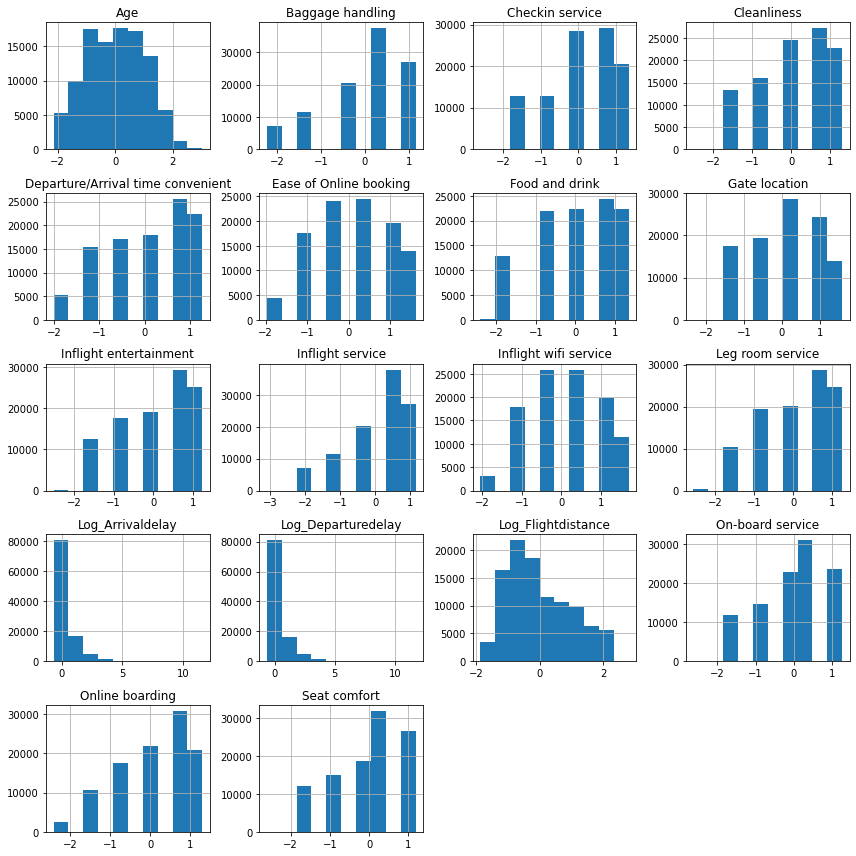

In [36]:
traindf_prepared.hist(figsize= (12,12))
plt.tight_layout()
plt.show()

### 4.3 Choosing K (No.of clusters)

In order to choose the optimal K value (no.of clusters), the elbow method is being used to run the Kmeans clustering on the training dataset. It is noted that the potential value of K is 2.

In [37]:
#Clustering
from sklearn.cluster import KMeans

In [38]:
SSE = []
for i in range(1, 8):
    model_i = KMeans(n_clusters= i, random_state = 42)
    model_i.fit(traindf_prepared)
    SSE.append(model_i.inertia_)
    #SSE is saved inside the inertia

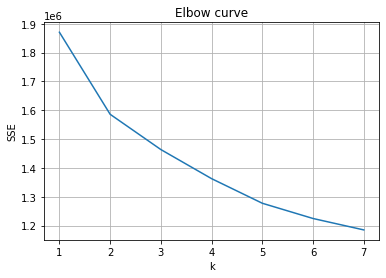

In [39]:
### Plot the elbow curve. What is a good k?

k = (range(1,8))
plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.plot(k, SSE)
plt.show()

In [40]:
#Performing with k clusters = 2
model = KMeans(n_clusters=2, random_state=42)
model.fit(traindf_prepared)

KMeans(n_clusters=2, random_state=42)

In [41]:
print("Attributes of the clustering solution:", )
print("SSE :", round(model.inertia_))
print("Num of iterations :" , model.n_iter_)
print("Cluster centers :" , model.cluster_centers_)

Attributes of the clustering solution:
SSE : 1585776
Num of iterations : 8
Cluster centers : [[-0.12232447 -0.33043505 -0.09190687 -0.19002871 -0.60608471 -0.02942739
  -0.48650751 -0.6798815  -0.84099679 -0.48138447 -0.37138877 -0.43799847
  -0.30889973 -0.44860819 -0.70658078 -0.19021895  0.07441771  0.09009086]
 [ 0.09996774  0.27004283  0.07510944  0.15529796  0.49531315  0.02404907
   0.39759058  0.55562241  0.68729134  0.39340386  0.3035116   0.35794733
   0.25244343  0.36661796  0.57744198  0.15545343 -0.0608167  -0.07362533]]


In [42]:
df["cluster"] = model.labels_

In [43]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Log_Flightdistance,Log_Departuredelay,Log_Arrivaldelay,cluster
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,5,5,25,18.0,neutral or dissatisfied,21.447611,5.000000,4.242641,1
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,4,1,1,6.0,neutral or dissatisfied,15.329710,1.000000,2.449490,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,4,5,0,0.0,satisfied,33.793490,0.000000,0.000000,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,1,4,2,11,9.0,neutral or dissatisfied,23.706539,3.316625,3.000000,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,3,0,0.0,satisfied,14.628739,0.000000,0.000000,1


In [44]:
df["cluster"].value_counts()

1    57236
0    46668
Name: cluster, dtype: int64

In [45]:
model.cluster_centers_

array([[-0.12232447, -0.33043505, -0.09190687, -0.19002871, -0.60608471,
        -0.02942739, -0.48650751, -0.6798815 , -0.84099679, -0.48138447,
        -0.37138877, -0.43799847, -0.30889973, -0.44860819, -0.70658078,
        -0.19021895,  0.07441771,  0.09009086],
       [ 0.09996774,  0.27004283,  0.07510944,  0.15529796,  0.49531315,
         0.02404907,  0.39759058,  0.55562241,  0.68729134,  0.39340386,
         0.3035116 ,  0.35794733,  0.25244343,  0.36661796,  0.57744198,
         0.15545343, -0.0608167 , -0.07362533]])

In [46]:
clust_means = pd.DataFrame(model.cluster_centers_, columns=traindf_prepared.columns)

In [47]:
print(clust_means)

        Age  Inflight wifi service  Departure/Arrival time convenient  \
0 -0.122324              -0.330435                          -0.091907   
1  0.099968               0.270043                           0.075109   

   Ease of Online booking  Food and drink  Gate location  Online boarding  \
0               -0.190029       -0.606085      -0.029427        -0.486508   
1                0.155298        0.495313       0.024049         0.397591   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0     -0.679881               -0.840997         -0.481384         -0.371389   
1      0.555622                0.687291          0.393404          0.303512   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0         -0.437998        -0.308900         -0.448608    -0.706581   
1          0.357947         0.252443          0.366618     0.577442   

   Log_Flightdistance  Log_Departuredelay  Log_Arrivaldelay  
0           -0.190219            0

### 4.4 Interpretation

The following cluster composition indicates that different groups of passengers have different ratings behaviors/patters. 

Based on the centroid, Cluster 0 is characterized by low values in the ratings for those who are younger. As for cluster 1, it is characterized by higher values in the ratings for those who are older.

In [48]:
import seaborn as sns

<AxesSubplot:>

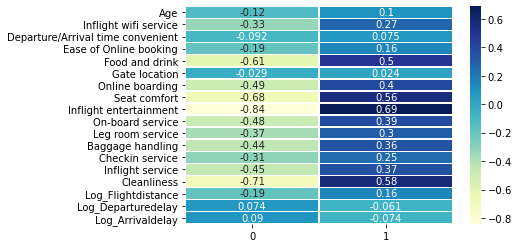

In [49]:
sns.heatmap(clust_means.T,  annot=True, linewidths=.5, cmap="YlGnBu")